Modules loaded
Training set samples:


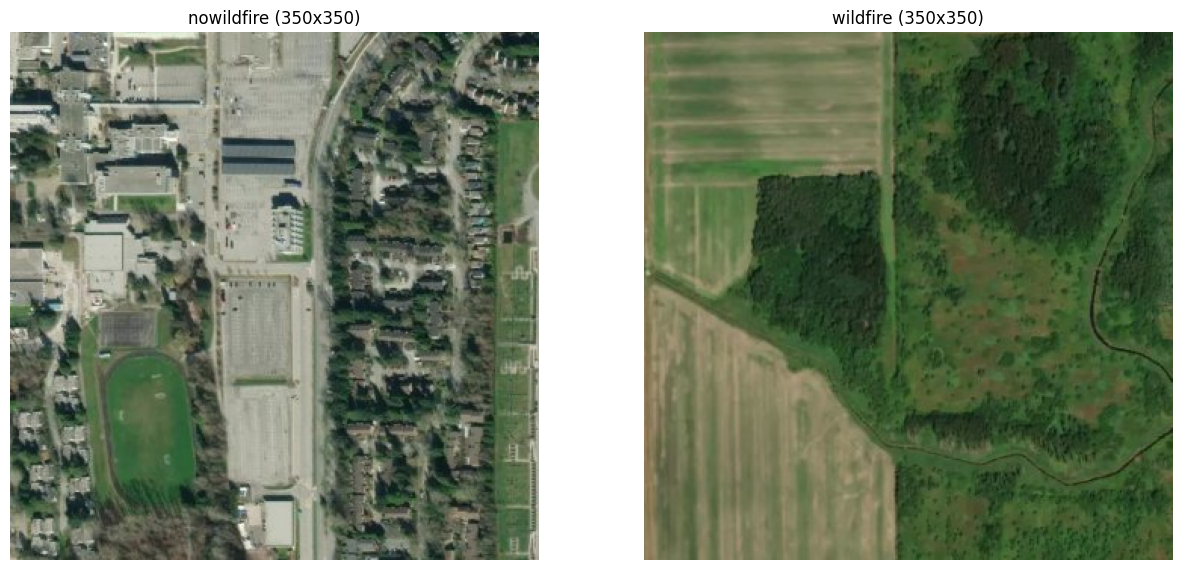

Validation set samples:


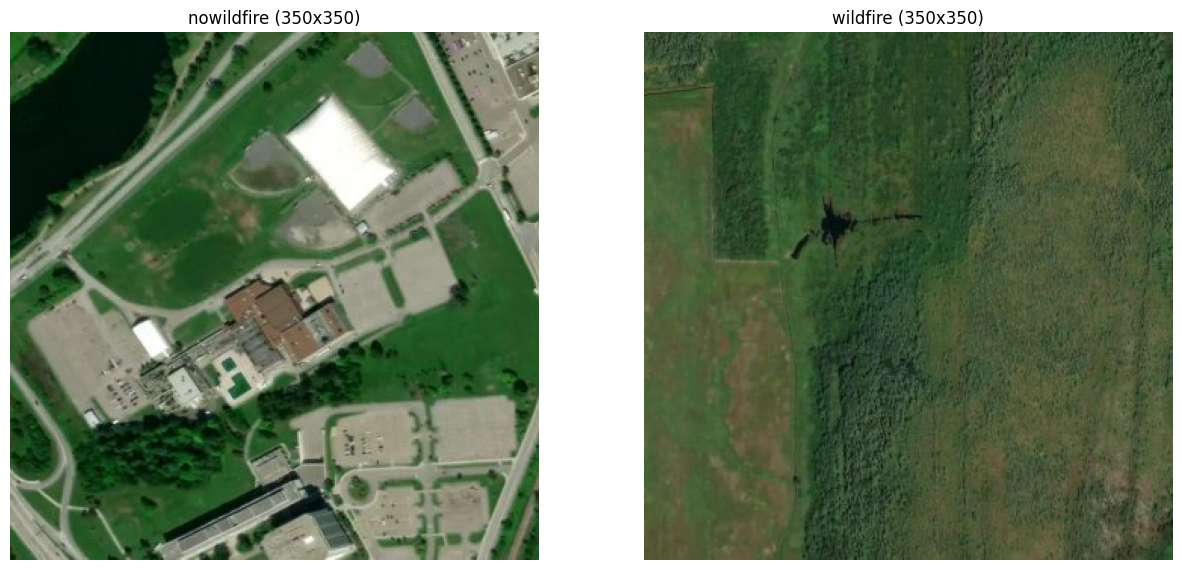

Test set samples:


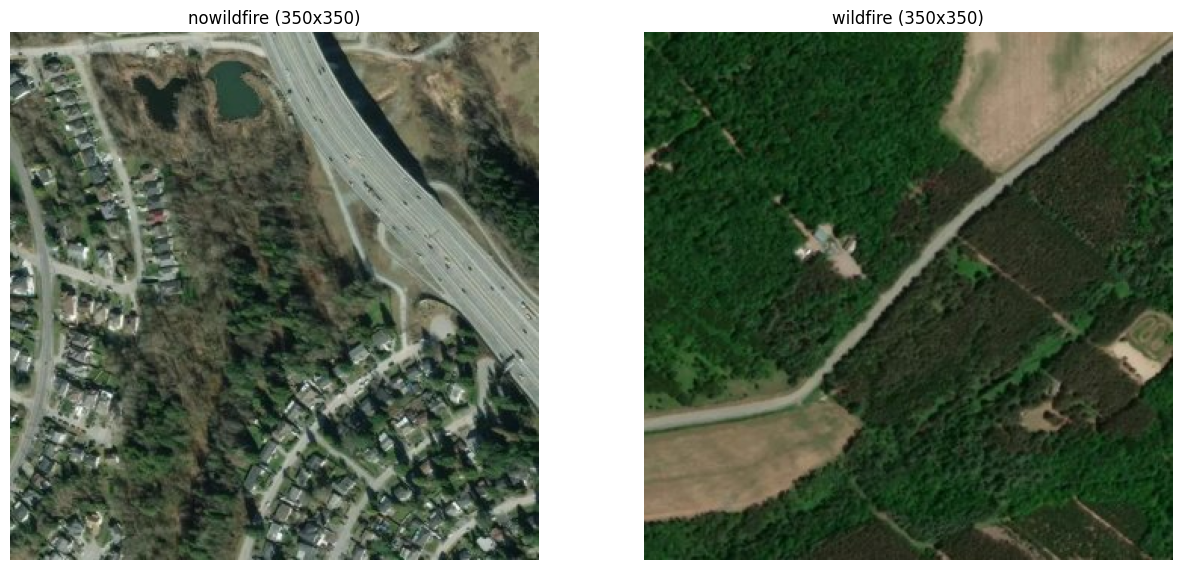

In [1]:
# Import necessary modules
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image
import random

# Import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Import deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

print('Modules loaded')

# Define dataset paths
train_dir = r'C:\Users\GOURU SAI PREMIKA\Desktop\hacko\wildfire\train'
valid_dir = r'C:\Users\GOURU SAI PREMIKA\Desktop\hacko\wildfire\valid'
test_dir = r'C:\Users\GOURU SAI PREMIKA\Desktop\hacko\wildfire\test'

# Function to display random samples from the dataset
def display_random_sample(dataset_dir):
    classes = os.listdir(dataset_dir)  # List of class directories
    plt.figure(figsize=(15, 10))  # Adjust the figure size if needed

    for i, class_name in enumerate(classes):
        class_dir = os.path.join(dataset_dir, class_name)
        image_files = os.listdir(class_dir)  # Get all images in the class folder
        random_image = random.choice(image_files)  # Select a random image
        img_path = os.path.join(class_dir, random_image)
        
        # Load the image with its original size
        img = load_img(img_path)
        
        # Display the image
        plt.subplot(1, len(classes), i + 1)  # Display images in a single row
        plt.imshow(img)
        plt.axis('off')  # Turn off axis for better visualization
        plt.title(f"{class_name} ({img.size[0]}x{img.size[1]})")  # Show class name and image size

    plt.show()

# Display samples from each set
print("Training set samples:")
display_random_sample(train_dir)

print("Validation set samples:")
display_random_sample(valid_dir)

print("Test set samples:")
display_random_sample(test_dir)


In [3]:
dir = r'C:\Users\GOURU SAI PREMIKA\Desktop\hacko\wildfire\train'
x_train = []
y_train = []
for direct in os.listdir(dir):
    print("Loading dataset training {}".format(direct))
    for filename in os.listdir(os.path.join(dir,direct)):
        img_path = os.path.join(dir,direct,filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (32,32))
        img = np.array(img)
        img = img/255
        x_train.append(img)
        y_train.append(direct)

Loading dataset training nowildfire
Loading dataset training wildfire


In [5]:
dir_val = r'C:\Users\GOURU SAI PREMIKA\Desktop\hacko\wildfire\valid'
x_val=[]
y_val=[]
for direct in os.listdir(dir_val):
    print("Loading dataset validation {}".format(direct))
    for filename in os.listdir(os.path.join(dir_val,direct)):
        img_path = os.path.join(dir_val,direct,filename)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(32,32))
        image = np.array(image)
        image = image/255
        x_val.append(image)
        y_val.append(direct)

Loading dataset validation nowildfire
Loading dataset validation wildfire


In [6]:
dir_test = r'C:\Users\GOURU SAI PREMIKA\Desktop\hacko\wildfire\test'
x_test=[]
y_test=[]
for direct in os.listdir(dir_test):
    print("Loading dataset test {}".format(direct))
    for filename in os.listdir(os.path.join(dir_test,direct)):
        img_path = os.path.join(dir_test,direct,filename)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(32,32))
        image = np.array(image)
        image = image/255
        x_test.append(image)
        y_test.append(direct)

Loading dataset test nowildfire
Loading dataset test wildfire


In [7]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)

In [8]:
y_train = [1 if label == 'wildfire' else 0 for label in y_train]
y_val = [1 if label == 'wildfire' else 0 for label in y_val]
y_test = [1 if label == 'wildfire' else 0 for label in y_test]

In [9]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [10]:
# Now check the shape of your datasets
print("x_train shape:", x_train.shape)  # Should be (num_samples, height, width, num_channels)
print("x_valid shape:", x_val.shape)
print("x_test shape:", x_test.shape)

print("y_train shape:", y_train.shape)
print("y_valid shape:", y_val.shape)
print("y_test shape:", y_test.shape)

x_train shape: (30250, 32, 32, 3)
x_valid shape: (6300, 32, 32, 3)
x_test shape: (6300, 32, 32, 3)
y_train shape: (30250,)
y_valid shape: (6300,)
y_test shape: (6300,)


In [11]:
# Step 1: Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    BatchNormalization(),
    
    Dense(1, activation='sigmoid')  # Output layer with number of classes
])

# Step 2: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           12

 Total params: 1,782,529 (6.80 MB)

 Trainable params: 1,781,313 (6.80 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

# Step 3: Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=15,
    batch_size=64,
    callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
)


Epoch 1/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 178s 366ms/step - accuracy: 0.9600 - loss: 0.1058 - val_accuracy: 0.8903 - val_loss: 0.2982
Epoch 2/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 176s 373ms/step - accuracy: 0.9663 - loss: 0.0967 - val_accuracy: 0.9041 - val_loss: 0.2258
Epoch 3/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 172s 363ms/step - accuracy: 0.9672 - loss: 0.0873 - val_accuracy: 0.9522 - val_loss: 0.1217
Epoch 4/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 175s 371ms/step - accuracy: 0.9684 - loss: 0.0871 - val_accuracy: 0.9559 - val_loss: 0.1205
Epoch 5/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 176s 372ms/step - accuracy: 0.9741 - loss: 0.0750 - val_accuracy: 0.9348 - val_loss: 0.1677
Epoch 6/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 199s 366ms/step - accuracy: 0.9744 - loss: 0.0709 - val_accuracy: 0.9552 - val_loss: 0.1295
Epoch 7/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 172s 364ms/step - accuracy: 0.9816 - loss: 0.0534 - val_accuracy: 0.9462 - val_loss: 0.1548
Epoch 8/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 173s 366ms/step - accuracy: 0.9819 -

In [17]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test Accuracy: {test_accuracy:.4f}')

197/197 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9706 - loss: 0.0965
Test Accuracy: 0.9416


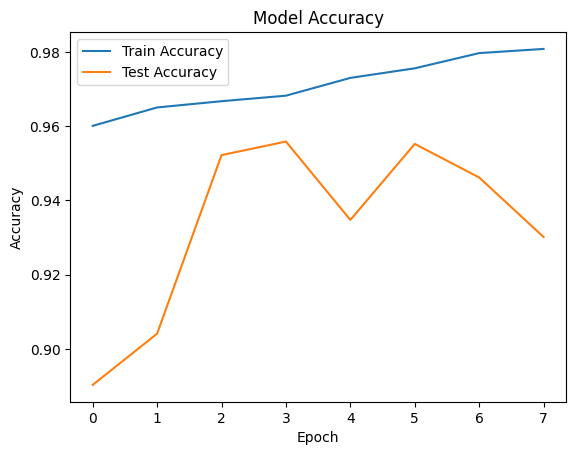

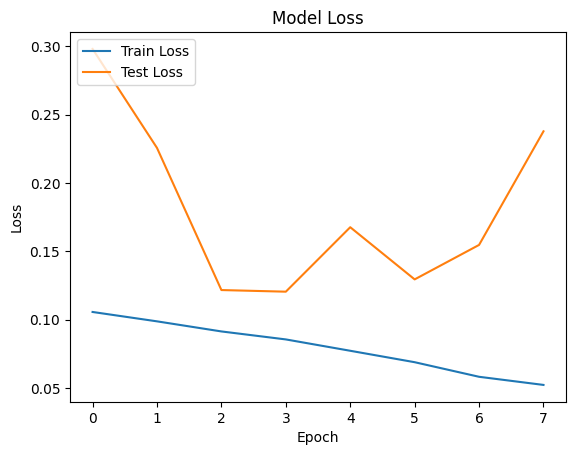

In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [19]:
# Predict on the datasets
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)
y_test_pred = model.predict(x_test)

# Convert probabilities to binary classes if using a classification model
y_train_pred_classes = (y_train_pred > 0.5).astype("int32")
y_val_pred_classes = (y_val_pred > 0.5).astype("int32")
y_test_pred_classes = (y_test_pred > 0.5).astype("int32")


946/946 ━━━━━━━━━━━━━━━━━━━━ 50s 52ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step


In [20]:
import ee
ee.Authenticate()
# Initialize the Earth Engine library
ee.Initialize(project='ee-codewarriors50')
print("Google Earth Engine is initialized and ready to use!")

Google Earth Engine is initialized and ready to use!


In [29]:
# Define the parameters
collection = 'COPERNICUS/S2'  # Updated dataset
start_date = '2023-01-01'  # Replace with your start date
end_date = '2023-12-31'  # Replace with your end date

# Define the coordinates of the rectangle (longitude, latitude)
long1, lat1 = -121.0, 37.0  # Bottom-left corner (replace with your values)
long2, lat2 = -122.0, 38.0  # Top-right corner (replace with your values)

# Create a rectangular geometry for the specified region
region = ee.Geometry.Rectangle([long1, lat1, long2, lat2])

# Get Sentinel-2 images, filtering for cloud coverage and date range
sentinel_images = (ee.ImageCollection(collection)
                   .filterDate(start_date, end_date)
                   .filterBounds(region)
                   .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)))

# Select the median composite to minimize cloud effects
image = sentinel_images.median().clip(region)

print("Sentinel-2 image successfully retrieved and processed!")
# Print image ID
image_id = image.id().getInfo()
print("Image ID:", image_id)

# Print image properties
image_properties = image.getInfo()['properties']
print("Image Properties:", image_properties)

# Print available bands
band_names = image.bandNames().getInfo()
print("Bands available:", band_names)


Sentinel-2 image successfully retrieved and processed!
Image ID: None
Image Properties: {'system:footprint': {'type': 'Polygon', 'coordinates': [[[65, -30], [90, -30], [90, -10], [65, -10], [65, -30]]]}}
Bands available: ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10', 'QA20', 'QA60']


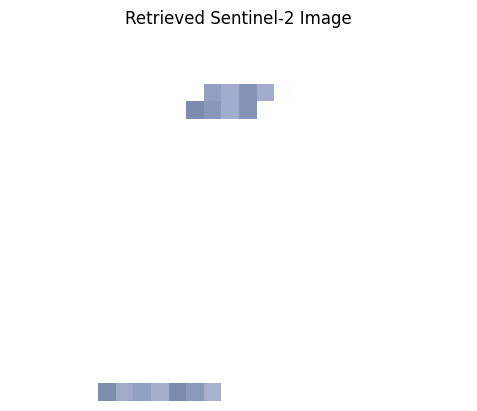

Image array shape: (32, 32, 3)


In [30]:
import requests
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Get the RGB bands: B4 (Red), B3 (Green), B2 (Blue)
rgb_image = image.select(['B4', 'B3', 'B2'])

# Define visualization parameters
vis_params = {
    'min': 0,
    'max': 3000,
    'bands': ['B4', 'B3', 'B2']
}

# Get image URL for RGB visualization
url = rgb_image.getThumbURL(params=vis_params)
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title('Retrieved Sentinel-2 Image')
plt.show()

# Resize to match model input shape
img = img.resize((32, 32))

# Convert image to RGB to drop alpha channel if present
img = img.convert("RGB")

# Convert to numpy array and normalize pixel values
img_array = np.array(img) / 255.0  # Normalize pixel values
print("Image array shape:", img_array.shape)  # Expected (32, 32, 3)



In [33]:
# Expand dimensions to match model input (batch size, height, width, channels)
input_image = np.expand_dims(img_array, axis=0)  # Shape (1, 32, 32, 3)

# Run the prediction
prediction = model.predict(input_image)
print("Prediction:", "Wildfire" if prediction[0]>0.95 else "No Wildfire")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Prediction: Wildfire


In [34]:
model.save('wildfire_model.h5')